In [1]:
import networkx as nx
import csv
import matplotlib.pyplot as plt
import graphviz
import numpy as np
import math
import operator
import matplotlib
import function as fn
from robustness.util import *
import robustness.util as rb
from hypothesis_testing import *

In [2]:
G_total = nx.read_gpickle('pickles/graphs/mathoverflow/total_1_1_1.gpickle')
G_total=G_total.to_undirected()

In [53]:
iteration = np.arange(0,1,0.001)

## Hypothesis 1: Ordered by reputation score (so by degree centrality, aggregated)

In [23]:
degree_centrality = get_degree_centrality()['total']

In [24]:
h1_nodes=[elem[0] for elem in degree_centrality]

In [25]:
rb.perform_robustness_test(G_total, 0.01, h1_nodes)

(20115, 4236)

In [54]:
h1_data = []
for fraction in iteration:
    h1_data.append(rb.perform_robustness_test(G_total, fraction, h1_nodes))


In [55]:
np.save('robustness_h1', h1_data)

## Hypothesis 2: Ordered number of views ( so by eigenvector centrality c2q)

In [27]:
eigenvector_centrality = get_eigenvector_centralities()['total']

In [28]:
h2_nodes=[elem[0] for elem in eigenvector_centrality]

In [29]:
rb.perform_robustness_test(G_total, 0.01, h2_nodes)

(22463, 1986)

In [56]:
h2_data = []
for fraction in iteration:
    h2_data.append(rb.perform_robustness_test(G_total, fraction, h2_nodes))


In [57]:
np.save('robustness_h2', h2_data)

## Hypothesis 3 : Ordered by upvotes (so by closeness centrality c2q incoming)

In [31]:
closeness_centrality = get_closeness_centrality()['c2q']

In [32]:
h3_nodes=[elem[0] for elem in closeness_centrality]

In [33]:
rb.perform_robustness_test(G_total, 0.01, h3_nodes)

(20024, 4309)

In [58]:
h3_data = []
for fraction in iteration:
    h3_data.append(rb.perform_robustness_test(G_total, fraction, h3_nodes))

In [59]:
np.save('robustness_h3', h3_data)

1000


## Hypothesis 4: ordered by reputation score(closeness centrality c2q incoming)

In [35]:
closeness_centrality = get_closeness_centrality()['c2q']

In [36]:
h4_nodes=[elem[0] for elem in closeness_centrality]

In [37]:
rb.perform_robustness_test(G_total, 0.01, h4_nodes)

(20024, 4309)

In [114]:
h4_data = []
for fraction in iteration:
    h4_data.append(rb.perform_robustness_test(G_total, fraction, h4_nodes))


In [61]:
np.save('robustness_h4', h4_data)

## Final graphics

In [104]:

h1_operational = [elem[0] for elem in h1_data]
h2_operational = [elem[0] for elem in h2_data]
h3_operational = [elem[0] for elem in h3_data]
h4_operational = [elem[0] for elem in h4_data]

h1_subgraphs = [elem[1] for elem in h1_data]
h2_subgraphs = [elem[1] for elem in h2_data]
h3_subgraphs = [elem[1] for elem in h3_data]
h4_subgraphs = [elem[1] for elem in h4_data]

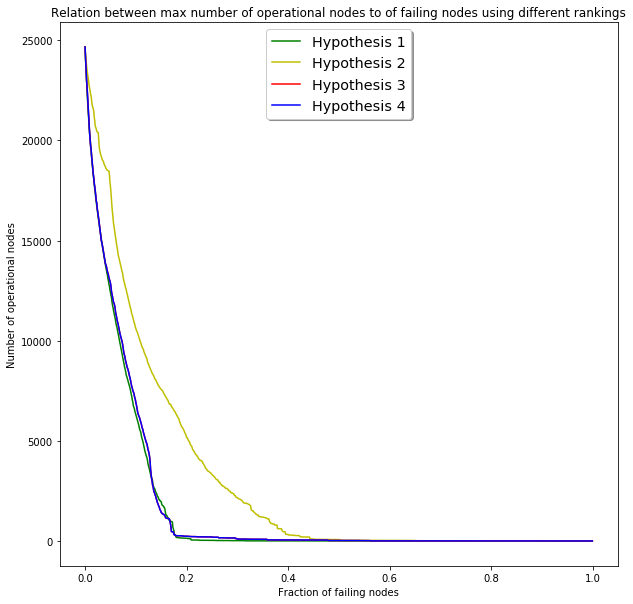

In [102]:
from matplotlib.pyplot import figure

fig, ax = plt.subplots(figsize=(10,10))

ax.plot(iteration, h1_operational, 'g', label='Hypothesis 1')
ax.plot(iteration, h2_operational, 'y', label='Hypothesis 2')
ax.plot(iteration, h3_operational, 'r', label='Hypothesis 3')
ax.plot(iteration, h4_operational,'b', label='Hypothesis 4')

ax.set_title('Relation between max number of operational nodes to of failing nodes using different rankings')
ax.set_xlabel('Fraction of failing nodes')
ax.set_ylabel('Number of operational nodes')

legend = ax.legend(loc='upper center', shadow=True, fontsize='x-large')
plt.show()

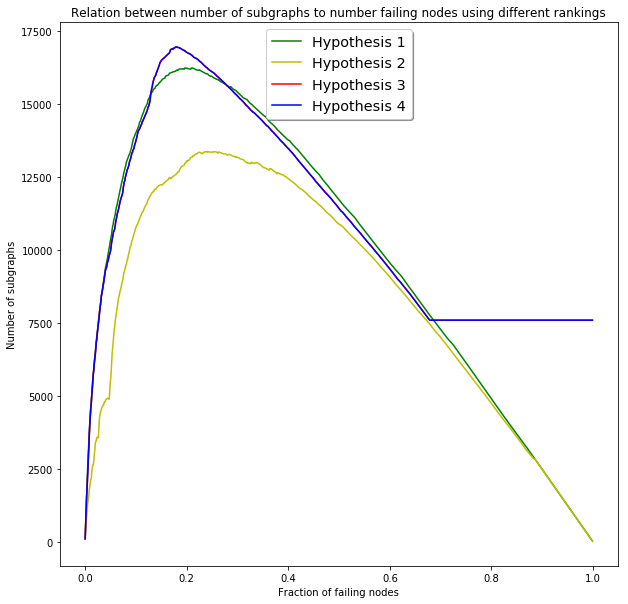

In [115]:
fig, ax = plt.subplots(figsize=(10,10))

ax.plot(iteration, h1_subgraphs, 'g', label='Hypothesis 1')
ax.plot(iteration, h2_subgraphs, 'y', label='Hypothesis 2')
ax.plot(iteration, h3_subgraphs, 'r', label='Hypothesis 3')
ax.plot(iteration, h4_subgraphs,'b', label='Hypothesis 4')

ax.set_title('Relation between number of subgraphs to number failing nodes using different rankings')
ax.set_xlabel('Fraction of failing nodes')
ax.set_ylabel('Number of subgraphs')

legend = ax.legend(loc='upper center', shadow=True, fontsize='x-large')
plt.show()